In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import re
import json
import time
import io
import jdatetime

In [2]:
pip install jdatetime

Note: you may need to restart the kernel to use updated packages.


# مشابه تصویر زیر یک اکسل از لینک های مربوط به هر نماد تهیه کنید
# با کپی و پیست کردن داده ها از سایت در اکسل و استخراج هایپر لینک ها اکسل زیر بدست می آید

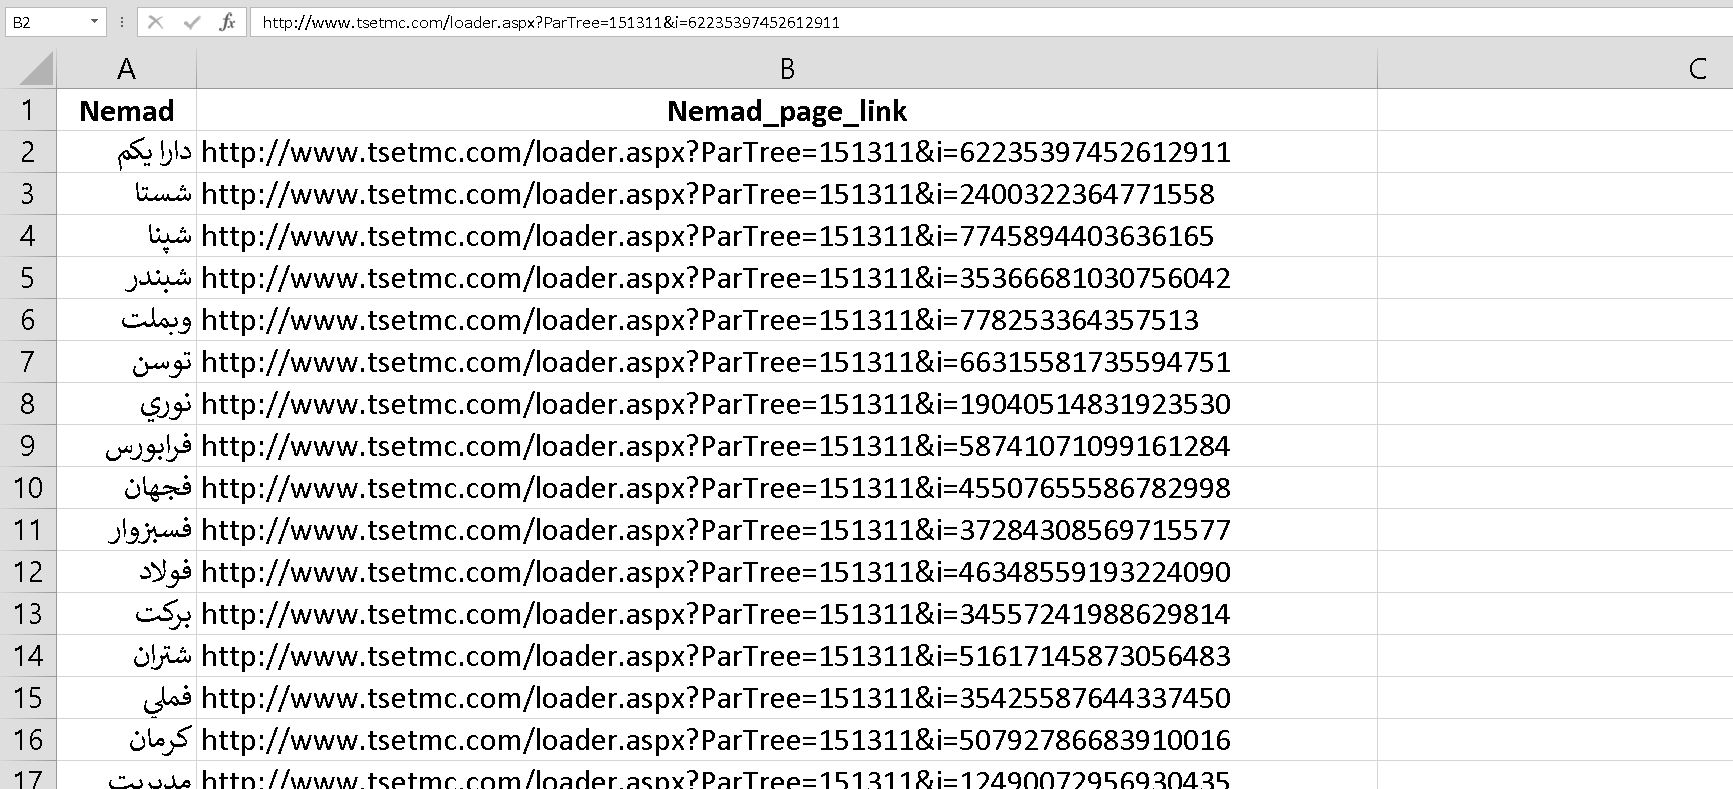

In [ ]:
# Use this VBA code in Excel to extract hyperlink,open a module in VBA and create this fucion.
'''
Function GetURL(rng As Range) As String
     On Error Resume Next
     GetURL = rng.Hyperlinks(1).Address 
End Function
'''

In [3]:
link=pd.read_excel(r'C:\Users\PC-SKE\Desktop\poolbank\TSETMC\nemad link.xlsx')


In [4]:
def stock_information(Dataframe,stock_name_list=None,stock_TSETMC_id=None):
    
    def subdataframe(Dataframe,stock_name_list=None,stock_TSETMC_id=None):
        
        if stock_name_list!=None:
            index_list=[]
            for i in stock_name_list:
                try:
                    index_list=index_list+Dataframe[Dataframe['nemad']==i].index.to_list()
                except:
                    continue
            Dataframe_4=Dataframe.iloc[index_list,:]
            return Dataframe_4
        if stock_TSETMC_id!=None:
            index_list=[]
            df_links_3=Dataframe.copy()
            df_links_3['stock_code_TSETMC']=df_links_3.iloc[:,1].apply(lambda x : x.split('=')[2])
            df_links_3.loc[:,'stock_code_TSETMC']=df_links_3.loc[:,'stock_code_TSETMC'].apply(lambda x : x.strip())
            for i in stock_TSETMC_id:
                try:
 

                    index_list=index_list+df_links_3[df_links_3['stock_code_TSETMC']==i].index.to_list()
                except:
                    continue
            Dataframe_4=Dataframe.loc[index_list,:]
            return Dataframe_4
        return Dataframe
#    --------------------------------------------------------------------------------------------------
    def stock_id(df_links):
        df_links_1=df_links.copy()
        df_links_1['stock_code_TSETMC']=df_links_1.iloc[:,1].apply(lambda x : x.split('=')[2])
        df_links_1.loc[:,'stock_code_TSETMC']=df_links_1.loc[:,'stock_code_TSETMC'].apply(lambda x : x.strip())

        columns_list=['code_stock_12','code_stock_5',
                                'company_name_English','code_company_4',
                                'company_name','stock_name',
                                'stock_persian_30','code_company_12',
                               'market','code_tablo',
                               'code_sector','name_sector',
                               'code_subsector','name_subsector','stock_code_TSETMC','stock_name_2']
        new_df=pd.DataFrame(columns=columns_list)

        for ind,row in df_links_1.iterrows():
            C=0

            url=f'http://www.tsetmc.com/Loader.aspx?Partree=15131M&i={row.iloc[2]}'
            while C<5:

                try:

                    resp=requests.get(url)
                    df_1=pd.read_html(resp.text,encoding='utf-8')
                    
                    if (df_1[0].empty)|len(df_1[0].index)<4:
                        
                        break
                    else:
                        df=df_1[0].T

                        df.columns=['code_stock_12','code_stock_5',
                                    'company_name_English','code_company_4',
                                    'company_name','stock_name',
                                    'stock_persian_30','code_company_12',
                                   'market','code_tablo',
                                   'code_sector','name_sector',
                                   'code_subsector','name_subsector']

                        df=df.drop(0)

                        df['stock_code_TSETMC']=row.loc['stock_code_TSETMC']
                        df['stock_name_2']=row.iloc[0]

                        new_df=pd.concat([new_df,df])

                        C=6
                        break
                except:
                    C+=1
        new_df.reset_index(drop=True,inplace=True)
        return new_df
#     -----------------------------------------------------------------------------------------------
    def stock_info(df):
        df_links_2=df.copy()
        df_links_2['stock_code_TSETMC']=df_links_2.iloc[:,1].apply(lambda x : x.split('=')[2])
        df_links_2.loc[:,'stock_code_TSETMC']=df_links_2.loc[:,'stock_code_TSETMC'].apply(lambda x : x.strip())
        new_df_2=pd.DataFrame(columns=['trade_purpose','CEO','address',
                        'phone_number','FAX','offic_address','shareholder_affairs_address',
                        'website','email','auditor','capital','year','financial_manager',
                        'shenaseh_meli','stock_code_TSETMC'])

        for ind,row in df_links_2.iterrows():
            url_info=f"http://www.tsetmc.com/Loader.aspx?Partree=15131V&s={row.iloc[0]}"
            C_2=0
            while C_2<5:
                try:
                    resp=requests.get(url_info)
                    df_2=pd.read_html(resp.text,encoding='utf-8')
                    
                    if (df_2[0].empty)|len(df_2[0].index)<4:
                        
                        break

                    else:
                        df=df_2[0].T
                        df=df.drop(0)
                        df=df.drop([14,15],axis=1)
                        df.columns=['trade_purpose','CEO','address',
                                    'phone_number','FAX','offic_address','shareholder_affairs_address',
                                    'website','email','auditor','capital','year','financial_manager',
                                    'shenaseh_meli']

                        df['stock_code_TSETMC']=row.loc['stock_code_TSETMC']
                        new_df_2=pd.concat([new_df_2,df])
                        C_2=6
                    break
                except:
                    C_2+=1
        new_df_2.reset_index(drop=True,inplace=True)
        return new_df_2
#     ---------------------------------------------------------------------------------------------------------------------
    df_x=subdataframe(Dataframe,stock_name_list=stock_name_list,stock_TSETMC_id=stock_TSETMC_id)
    df_id=stock_id(df_x)
    df_info=stock_info(df_x)
    
    stock_information_df=pd.merge(df_id,df_info,on='stock_code_TSETMC',how='outer')

    stock_information_df.reset_index(drop=True,inplace=True)
    
    return stock_information_df

# استخراج آخرین جدول سهامداران

In [5]:
def shareholders(dataframe,stock_name_list=None,stock_TSETMC_id=None):
    dataframe_2=stock_information(dataframe,stock_name_list,stock_TSETMC_id)
    total_share=pd.DataFrame(columns=[
        'Shareholder','Share','Percent','Change','Compony','shenaseh_meli','shareholder_id'
    ])
    for ind,row in dataframe_2.iterrows():
        s=row.loc['code_company_12']
        resp=requests.get(f'http://www.tsetmc.com/Loader.aspx?Partree=15131T&c={s}')

        df=pd.read_html(resp.text,encoding='utf-8')
        if df[0].empty:
            continue
        else:
            df_share=df[0].dropna(axis=1)
            df_share.columns=['Shareholder','Share','Percent','Change']
            df_share['Compony']=row.loc['company_name']
            df_share['shenaseh_meli']=row.loc['shenaseh_meli']

            soup=BeautifulSoup(resp.content,'html.parser')
            l=[i['onclick'].split(',')[0].split("'")[1] for i in soup.find_all('tr',attrs={'class':"sh"})]
            if len(l)==len(df_share.index):
                df_share['shareholder_id']=l

            total_share=pd.concat([df_share,total_share])
    total_share.reset_index(drop=True,inplace=True)  
    return total_share

In [32]:
shareholders(link,stock_name_list=['شستا','بركت'])

,Shareholder,Share,Percent,Change,Compony,shenaseh_meli,shareholder_id
0,شركت كارانديش دوران معاصر-سهامي خاص-,3 B,48.90,50000,گروه دارويي بركت,10320275643,50602
1,شركت گروه سرمايه گذاري تدبير-سهامي عام-,510 M,8.79,50000,گروه دارويي بركت,10320275643,70677
2,شركت واسط مالي آبان پنجم-بامسئوليت محدود-,435 M,7.49,0,گروه دارويي بركت,10320275643,70292
3,BFMصندوق سرمايه گذاري.ا.ب.تدبيرگران فردا,250 M,4.31,1000000,گروه دارويي بركت,10320275643,46036
4,شركت سرمايه گذاري پويا-سهامي عام-,217 M,3.74,50000,گروه دارويي بركت,10320275643,44289
5,شركت پالايش پارسيان سپهر-سهامي خاص-,122 M,2.09,0,گروه دارويي بركت,10320275643,47748
6,PRXسبد-شرك13364--ستا07156-ستاداجرايي فرما,116 M,2.00,1000000,گروه دارويي بركت,10320275643,62446
7,سازمان تامين اجتماعي,126 B,88.76,0,سرمايه گذاري تامين اجتماعي,10101044869,99


In [23]:
def period(url,Start_date,End_date):
    if Start_date==None:
        Start_date='1380/01/01'

        
    resp=requests.get(url)
    cal=pd.read_csv(io.BytesIO(resp.content),header=None)

    date=cal.T.iloc[0::3].values.flatten().tolist()
    gdate=cal.T.iloc[1::3].values.flatten().tolist()
    gdate.insert(len(gdate),None)
    price=cal.T.iloc[2::3].values.flatten().tolist()
    price.insert(len(price),None)

    date_data={'date':date,
               'gdate':gdate,
               'price':price}
    df=pd.DataFrame(date_data)
    df.loc[len(df)-1,'date']=str(df.loc[len(df)-1,'date'])+";"
    df.loc[0,'date']=";"+df.loc[0,'date']
    df['j_date']=df['date'].apply(lambda x : str(x).split(';')[1])
    df['volume']=df['date'].apply(lambda x : str(x).split(';')[0])
    df.volume=df.volume.shift(-1)
    df=df[:-1]
    df.loc[:,'gdate']=df.loc[:,'gdate'].astype(int)
    df.loc[:,'gdate']=df.loc[:,'gdate'].astype(str)
    df.loc[:,'j_date']=df.loc[:,'j_date'].apply(lambda x: jdatetime.date(int(x.split("/")[0]),
                                                                         int(x.split("/")[1]),
                                                                         int(x.split("/")[2])))

    Start_date=jdatetime.date(int(Start_date[:4]),
                              int(Start_date[5:7]),
                              int(Start_date[8:10])) 
    if End_date==None:
        End_date=jdatetime.date.today()
    else:
        End_date=jdatetime.date(int(End_date[:4]),
                              int(End_date[5:7]),
                              int(End_date[8:10]))

    l=df[(df['j_date']>=Start_date)&(df['j_date']<End_date)]['gdate'].to_list()
    return l

In [15]:
v=jdatetime.date(1400,1,12)
z=jdatetime.date.today()

jdatetime.datetime(1400, 8, 24, 11, 36, 17, 863538)

In [18]:
v<z

TypeError: unsupported operand type for >: '<class 'jdatetime.date'>'

# استخراج جدول سهامداران در پایان هر روز معاملات

In [20]:
def shareholders_history(dataframe,stock_name_list=None,stock_TSETMC_id=None,Start_Data=None,End_Date=None):
    dataframe_3=stock_information(dataframe,stock_name_list,stock_TSETMC_id)

    shareholders_history_df=pd.DataFrame(columns=[
        'shareHolderID',
        'shareHolderName',
        'cIsin','dEven',
        'numberOfShares',
        'perOfShares','change',
        'changeAmount',
        'Compony',
        'shenaseh_meli',
        'Date'
    ])


    page=None
    for ind,row in dataframe_3.iterrows():
        
        page=row.loc['stock_code_TSETMC']
        download_link=f'http://www.tsetmc.com/tsev2/data/InstCalendar.aspx?i={page}'
        l_date=period(download_link,Start_Data,End_Date)
        
        for date_number in l_date:
            
            T=0
            while T<5:
                try:
                    url=f'http://cdn.tsetmc.com/api/Shareholder/{page}/'+f'{date_number}'
                    resp=requests.get(url)
                    dictdump = json.loads(resp.text)
                    df=pd.DataFrame(dictdump['shareShareholder'])
                    if df.empty:
                        
                        break
                    else:
                        
                        df['Compony']=row.loc['stock_name']
                        df['shenaseh_meli']=row.loc['shenaseh_meli']
                        
                        df['Date']=date_number
                        
                        
                        shareholders_history_df=pd.concat([shareholders_history_df,df])
                        
                        break
                        T=6
                except:
                    
                    T+=1
            
            
    shareholders_history_df.reset_index(drop=True,inplace=True)        
    return shareholders_history_df

In [33]:
link_1=link.sample(1)

In [34]:
link_1

,nemad,page-link
351,بنيرو,http://www.tsetmc.com/loader.aspx?ParTree=1513...


In [36]:
shareholders_history(link_1)


,shareHolderID,shareHolderName,cIsin,dEven,numberOfShares,perOfShares,change,changeAmount,Compony,shenaseh_meli,Date
0,332,شركت تعميرات نيروگاهي ايران,IRO1NIRO0008,20081207,27993065.0,20.73,1,0.0,بنيرو,10101260035,20081206
1,336,شركت توزيع نيروي برق مركزتهران,IRO1NIRO0008,20081207,21579229.0,15.98,1,0.0,بنيرو,10101260035,20081206
2,498,شركت سرمايه گذاري صنايع برق وآب صبا-سهامي عام-,IRO1NIRO0008,20081207,6687900.0,4.95,1,0.0,بنيرو,10101260035,20081206
3,2422,شخص حقيقي,IRO1NIRO0008,20081207,2001026.0,1.48,1,0.0,بنيرو,10101260035,20081206
4,332,شركت تعميرات نيروگاهي ايران,IRO1NIRO0008,20081206,27993065.0,20.73,0,0.0,بنيرو,10101260035,20081206
...,...,...,...,...,...,...,...,...,...,...,...
92557,1064,شركت س اتهران س.خ-م ك م ف ع-,IRO1NIRO0008,20211114,166118258.0,1.76,1,0.0,بنيرو,10101260035,20211114
92558,1065,شركت س اخراسان رضوي س.خ-م ك م ف ع-,IRO1NIRO0008,20211114,160250155.0,1.70,1,0.0,بنيرو,10101260035,20211114
92559,2674,شركت س افارس س.خ-م ك م ف ع-,IRO1NIRO0008,20211114,120759243.0,1.28,1,0.0,بنيرو,10101260035,20211114
92560,2662,شركت س اخوزستان س.خ-م ك م ف ع-,IRO1NIRO0008,20211114,117599350.0,1.24,1,0.0,بنيرو,10101260035,20211114


# استخراج تاریخچه معاملات

In [8]:
def trade_history(dataframe,stock_name_list=None,stock_TSETMC_id=None,Start_Data=None,End_Date=None):
    dataframe_5=stock_information(dataframe,stock_name_list,stock_TSETMC_id)


    trade_history_df=pd.DataFrame(columns=['insCode','dEven','nTran','hEven',
                                           'qTitTran','pTran','qTitNgJ','iSensVarP',
                                           'pPhSeaCotJ','pPbSeaCotJ',
                                           'iAnuTran','xqVarPJDrPRf',
                                           'canceled'
                                           'Compony',
                                           'shenaseh_meli',
                                           'Date'
                                          ])
    page=None
    for ind,row in dataframe_5.iterrows():
        page=row.loc['stock_code_TSETMC']
        download_link=f'http://www.tsetmc.com/tsev2/data/InstCalendar.aspx?i={page}'
        l_date=period(download_link,Start_Data,End_Date)
        


        for date_number in l_date:
            T=0
            while T<5:
                try:

                    url=f'http://cdn.tsetmc.com/api/Trade/GetTradeHistory/{page}/{date_number}/true'
                    
                    resp=requests.get(url)
                    
                    dictdump = json.loads(resp.text)
                    
                    df_5=pd.DataFrame(dictdump['tradeHistory'])
                   
                    if df_5.empty:
                        date_number=date_number[:6]+f'{int(date_number[-2:])}'
                        url=f'http://cdn.tsetmc.com/api/Trade/GetTradeHistory/{page}/{date_number}/true'
                        resp=requests.get(url)
                    
                        dictdump = json.loads(resp.text)
                    
                        df_5=pd.DataFrame(dictdump['tradeHistory'])
                        if df_5.empty:
                            break
                        
                        else:
                            df_5['Compony']=row.loc['stock_name_2']
                            df_5['shenaseh_meli']=row.loc['shenaseh_meli']

                            df_5['Date']=date_number


                            trade_history_df=pd.concat([trade_history_df,df_5])
                        
                    else:
                        
                        df_5['Compony']=row.loc['stock_name_2']
                        df_5['shenaseh_meli']=row.loc['shenaseh_meli']
                        
                        df_5['Date']=date_number
                        
                        
                        trade_history_df=pd.concat([trade_history_df,df_5])
                        
                        
                        T=6
                except:
                    T+=1
                    
    trade_history_df.reset_index(drop=True,inplace=True)
    return trade_history_df

In [10]:
trade_history(link_1,Start_Data='1400/08/01',End_Date='1400/08/05')

,insCode,dEven,nTran,hEven,qTitTran,pTran,qTitNgJ,iSensVarP,pPhSeaCotJ,pPbSeaCotJ,iAnuTran,xqVarPJDrPRf,canceledCompony,shenaseh_meli,Date,canceled,Compony
0,None,0,44,115853,347,28618.0,0, ,0.0,0.0,0,0.0,NaN,10101701799,20211023,0.0,پلوله
1,None,0,43,114015,180,28618.0,0, ,0.0,0.0,0,0.0,NaN,10101701799,20211023,0.0,پلوله
2,None,0,42,111812,3000,28618.0,0, ,0.0,0.0,0,0.0,NaN,10101701799,20211023,0.0,پلوله
3,None,0,41,110311,1000,28618.0,0, ,0.0,0.0,0,0.0,NaN,10101701799,20211023,0.0,پلوله
4,None,0,40,110203,224,28618.0,0, ,0.0,0.0,0,0.0,NaN,10101701799,20211023,0.0,پلوله
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,None,0,11,90934,1500,27639.0,0, ,0.0,0.0,0,0.0,NaN,10101701799,20211026,0.0,پلوله
155,None,0,10,90931,5000,27639.0,0, ,0.0,0.0,0,0.0,NaN,10101701799,20211026,0.0,پلوله
156,None,0,9,90926,500,27639.0,0, ,0.0,0.0,0,0.0,NaN,10101701799,20211026,0.0,پلوله
157,None,0,8,90421,287,27639.0,0, ,0.0,0.0,0,0.0,NaN,10101701799,20211026,0.0,پلوله


In [49]:
link_2=link[(link.index>10)&(link.index<21)]
link_2

,nemad,page-link
11,فولاد,http://www.tsetmc.com/loader.aspx?ParTree=1513...
12,كرمان,http://www.tsetmc.com/loader.aspx?ParTree=1513...
13,شتران,http://www.tsetmc.com/loader.aspx?ParTree=1513...
14,خبنيان,http://www.tsetmc.com/loader.aspx?ParTree=1513...
15,فملي,http://www.tsetmc.com/loader.aspx?ParTree=1513...
16,وبملت,http://www.tsetmc.com/loader.aspx?ParTree=1513...
17,مديريت,http://www.tsetmc.com/loader.aspx?ParTree=1513...
18,بركتح,http://www.tsetmc.com/loader.aspx?ParTree=1513...
19,وتجارت,http://www.tsetmc.com/loader.aspx?ParTree=1513...
20,كيمياتك,http://www.tsetmc.com/loader.aspx?ParTree=1513...


In [42]:
def internet_on():
    try:
        requests.get('http://google.com', timeout=2)
        return True
    except: 
        return False 

In [50]:
for j in link_2.index.to_list():
    B=2
    while B==2:
        if internet_on():
            path1=r"C:\Users\PC-SKE\Desktop\poolbank\TSETMC"
            path2=path1+f"\\shareholders\\{link_2.loc[j,'nemad']}.csv"
            path3=path1+f"\\tradehistory\\{link_2.loc[j,'nemad']}.csv"
            subdf=link_2[link_2.index==j]
            df_s=shareholders_history(subdf)
            df_s.to_csv(path2,encoding='utf-8-sig',index=False)

            df_t=trade_history(subdf)
            df_t.to_csv(path3,encoding='utf-8-sig',index=False)
            break
        else:
            B=2